## Language Analysis of Alexithymic Discourse

<hr>

Alexithymic Language Project / raul@psicobotica.com / V2 release (sept 2020)

<hr>

## Latent Space Feature Engineering (embeddings)
### Using Spanish 3 billion Word2Vec

- Pre-trained model: https://github.com/aitoralmeida/spanish_word2vec 
- Get word vectors for Spanish, compute consine similarity and distances. 
- Build a embedding representation of documents
- Export a file with word vectors corresponding to SPECIFIC WORDS IN THIS CORPUS.

## Data set load 

In [43]:
import pandas as pd 
import numpy as np
import ast

## Load features dataset
- Data is already pre-processed (1-Preprocessing). 
- Basic NLP features are already calculated (2-Features). 
- Some additional BoW features have been added (3-BoW).
- Some additional TF/IDF features have been added (3-TFIDF).
- N-Gram models have been generated (3-N-Grams). 
- PoS lists for each document identified (4-Lexicosemantics). 
- Writer's personality variables inferred (5-Personality).
- Sentiment analysis (6-Sentiment). 
- Topic modeling with LSA (7-LatentSemantic). 
- Topic modeling using LDA (8-LantentDirichletAllocation).
- Word2Vec traning (CBoW, SkipGram) (9-Word2Vec). 

In [2]:
feats_dataset_path = "https://raw.githubusercontent.com/raul-arrabales/alexithymic-lang/master/data/Prolexitim_v2_features_8.csv"
alex_df = pd.read_csv(feats_dataset_path, header=0, delimiter=";")

In [3]:
alex_df.sample(3)

,Code,TAS20,F1,F2,F3,Gender,Age,Card,T_Metaphors,T_ToM,...,AFINN_Words_Int,AFINN_Stems_Int,AFINN_Words_Max,AFINN_Stems_Max,Watson_Sent,Clean_Text,LDA4_Umap2_0,LDA4_Umap2_1,LDA10_Topic,LDA4_Topic
20,3a7bc6a0450eda9cc016324a2ee5b749,56,18,20,18,2,23,11,0,0,...,1.5,0.0,3,0,0.000000,bosque encantado habitaba nadie día apareció t...,2.220180,3.491362,0,0
165,f218eb77c97d846957ea8dc03ad38075,63,19,19,25,1,38,9VH,1,0,...,0.0,0.5,0,1,0.000000,tumbado amigos viajando tren destino desconocido,0.709412,8.056230,9,3
98,d14d5cbe51c764156f09db8a15d79a97,49,18,12,19,2,23,11,0,0,...,1.0,0.5,2,1,0.534224,cascada encantada escondida final bosque niños...,1.786455,1.628524,6,1


## Load the word vectors
- [Gensim KeyedVectors object](https://radimrehurek.com/gensim/models/keyedvectors.html)

In [4]:
# ! pip install pyemd

  Using cached pyemd-0.5.1.tar.gz (91 kB)
  Created wheel for pyemd: filename=pyemd-0.5.1-cp37-cp37m-win_amd64.whl size=79272 sha256=ae27ec822ff3059e8332ce719096034607b10a6a3d63116cb88c9bcff9caffeb
  Stored in directory: c:\users\array\appdata\local\pip\cache\wheels\91\ed\01\9f0beae80e84fc5053f69df3bf956308f2f1ca14b0bf422c32
Successfully built pyemd


You should consider upgrading via the 'c:\users\array\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
from gensim.models import KeyedVectors
import pyemd

In [5]:
# My copy of Spanish 3 Billion Word2Vec (3 GB)
word_vectors = KeyedVectors.load('D:\Dropbox-Array2001\Dropbox\DataSets\Spanish Word2Vec\complete.kv', mmap='r')

In [6]:
# Testing Word Vectors 
word_vectors.most_similar("niño")

[('chiquillo', 0.8634899854660034),
 ('bebé', 0.8505645990371704),
 ('crío', 0.842483401298523),
 ('muchacho', 0.7765985727310181),
 ('niñito', 0.7588649988174438),
 ('chico', 0.75837242603302),
 ('cachorro', 0.7369438409805298),
 ('muchachito', 0.7227175831794739),
 ('gatito', 0.6718686819076538),
 ('hombre', 0.6658662557601929)]

In [7]:
# Example of one 400 dim vector
word_vectors.get_vector("niño")[0:10]

memmap([-0.98019737,  0.37916845, -1.6284896 ,  0.74026036,  0.67275375,
        -1.6113833 , -1.4873409 ,  1.6933979 ,  0.30024448,  0.6112603 ],
       dtype=float32)

In [8]:
word_vectors.similar_by_vector(
    word_vectors.get_vector("rey") - 
    word_vectors.get_vector("hombre") + 
    word_vectors.get_vector("mujer"))

[('reina', 0.7074883580207825),
 ('princesa', 0.6571576595306396),
 ('emperatriz', 0.6183611154556274),
 ('esposa', 0.5992065072059631),
 ('doncella', 0.5958696603775024),
 ('dama', 0.5885562896728516),
 ('infanta', 0.5775145292282104),
 ('mujer', 0.5741763114929199),
 ('concubina', 0.5553327202796936),
 ('hija', 0.5514962673187256)]

In [9]:
word_vectors.similar_by_vector(
    word_vectors.get_vector("enfermera") - 
    word_vectors.get_vector("mujer") + 
    word_vectors.get_vector("hombre"))

[('enfermero', 0.701812744140625),
 ('hombre', 0.6676745414733887),
 ('individuo', 0.6419544219970703),
 ('celador', 0.6333192586898804),
 ('cirujano', 0.6183052062988281),
 ('médico', 0.6180358529090881),
 ('camillero', 0.6082327365875244),
 ('muchacho', 0.6047707200050354),
 ('chico', 0.6040195822715759),
 ('hombrecillo', 0.5817157030105591)]

In [10]:
word_vectors.similarity('guitarra','violín')

0.6524644

In [11]:
sentence1 = 'Obama se dirige a los medios en Illinois'.lower().split()
sentence2 = 'El presidente saluda a la prensa en Chicago'.lower().split()

word_vectors.wmdistance(sentence1, sentence2)

28.55840932553196

In [12]:
word_vectors.distance("media", "hora") 

0.7943162471055984

In [13]:
word_vectors.n_similarity(['restaurante', 'chino', 'caro'], ['restaurante', 'japonés', 'barato'])

0.91821563

## Word vectors visualization

In [14]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 

In [15]:
type(word_vectors.vector_size)

int

In [16]:
sentence = ast.literal_eval(alex_df['Tokens'][4])
print(sentence)

['hombre', 'desolado', 'porque', 'se', 'ha', 'encontrado', 'a', 'su', 'mujer', 'fallecida']


In [17]:
def encode_words(w2v_model, word_list):
    
    # empty 2D array for word vectors
    num_words = len(word_list)
    num_dims = w2v_model.vector_size
    enc_words = np.zeros((num_words, num_dims))

    # fill the 2D array with actual vectors
    word_idx = 0
    for w in word_list: 
        if (w in w2v_model.vocab):
            enc_words[word_idx] = w2v_model.get_vector(w)
        word_idx += 1
        
    return enc_words

In [18]:
enc_words = encode_words(word_vectors, sentence)

In [19]:
enc_words.shape

(10, 400)

In [20]:
word_vectors.get_vector('porque')[0:10]

memmap([ 1.3146172 , -0.9050656 ,  0.44533622,  0.98907256, -0.15550552,
        -1.3354483 ,  1.1072322 ,  1.1321119 ,  0.7280162 ,  1.4634275 ],
       dtype=float32)

In [21]:
enc_words[2][0:10]

array([ 1.31461716, -0.9050656 ,  0.44533622,  0.98907256, -0.15550552,
       -1.33544827,  1.10723221,  1.13211191,  0.7280162 ,  1.46342754])

In [22]:
# Reduce dimensionality to 2D
tsne = TSNE(n_components=2)
tsne_2D = tsne.fit_transform(enc_words)

In [23]:
tsne_2D

array([[  -1.4868863,  -75.986465 ],
       [ -42.981693 ,  -11.132301 ],
       [ -71.80765  ,   63.026814 ],
       [  33.93409  ,   -7.6932178],
       [  87.74383  ,  -78.958374 ],
       [-120.21834  ,  -30.229548 ],
       [  20.850706 , -150.84981  ],
       [ 108.0179   ,   17.11247  ],
       [ -75.623695 , -110.54722  ],
       [  19.531069 ,   72.81822  ]], dtype=float32)

In [24]:
# fd with 2D projections of vectors
df_2D = pd.DataFrame(tsne_2D, index=sentence, columns=['tsne_0', 'tsne_1'])

In [25]:
df_2D

,tsne_0,tsne_1
hombre,-1.486886,-75.986465
desolado,-42.981693,-11.132301
porque,-71.807648,63.026814
se,33.934090,-7.693218
ha,87.743828,-78.958374
encontrado,-120.218338,-30.229548
a,20.850706,-150.849808
su,108.017899,17.112471
mujer,-75.623695,-110.547218
fallecida,19.531069,72.818222


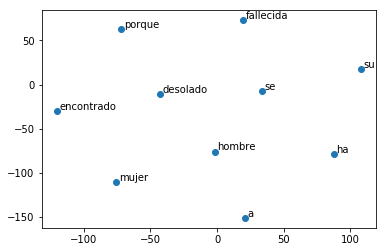

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df_2D['tsne_0'], df_2D['tsne_1'])

for word, pos in df_2D.iterrows():
    ax.annotate(word, pos+1.8)
    
plt.show()

In [27]:
# let's get all that encapsulated in a function
def plot_encoded_words(vectors, words):
    
    # Reduce dimensionality to 2D
    tsne = TSNE(n_components=2)
    tsne_2D = tsne.fit_transform(vectors)
    
    # df with 2D projections of vectors
    df_2D = pd.DataFrame(tsne_2D, index=words, columns=['tsne_0', 'tsne_1'])
    
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(df_2D['tsne_0'], df_2D['tsne_1'])

    for word, pos in df_2D.iterrows():
        ax.annotate(word, pos+1.8, fontsize=14)
    
    plt.show()
    return df_2D

## Explore vector space semantics geometry

In [28]:
words = "Wikipedia es una enciclopedia libre, políglota y editada de manera colaborativa. Es administrada por la Fundación Wikimedia, una organización sin ánimo de lucro cuya financiación está basada en donaciones. Sus más de 50 millones de artículos en 300 idiomas han sido redactados en conjunto por voluntarios de todo el mundo,5​ lo que suma más de 2000 millones de ediciones, y permite que cualquier persona pueda sumarse al proyecto para editarlos, a menos que la página se encuentre protegida contra vandalismos para evitar problemas o disputas".split()

In [29]:
encoded = encode_words(word_vectors, words)

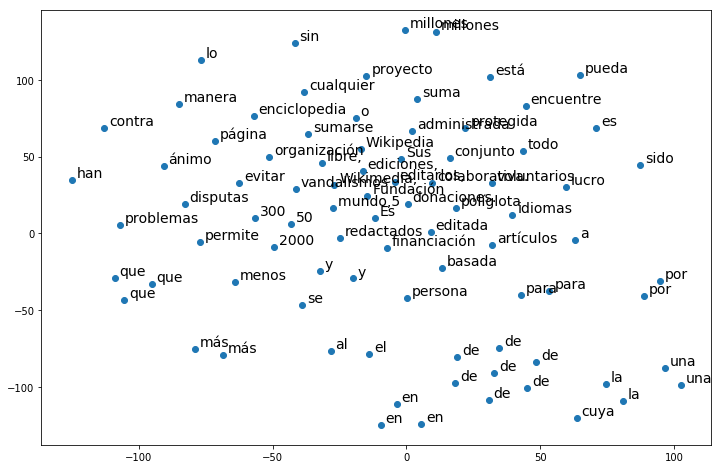

In [30]:
df_2D = plot_encoded_words(encoded, words)

We lose the higher dimension geometry due to TSNE 2D projection (same word in different positions)

In [31]:
# synomims of "loco" and "dinero"
words = "alienado - alunado - arrojado - atolondrado - aturdir - aturdirse - chalado - chiflado - ido - vesánico - cuerdo - demente - desequilibrado - desquiciado - enajenado - energúmeno - enloquecer - enloquecido - frenético - grillado - insensato - irresponsable - lunático - majareta - maniaco - maniático - orate - paranoico - perturbado - pirado - poseso - psicópata - raro - sonado - tarumba - tocado - tronado bien - bienes - billete - capital - caudal - cuarto - cuartos - efectivo - finanzas - fondo - fondos - fortuna - guita - hacienda - metálico - moneda - monís - mosca - numerario - oro - parné - pasta - peculio - pela - perra - perras - plata - recurso - recursos - riqueza - tela - tesoro - vuelta".replace('-', '').split()

In [32]:
encoded = encode_words(word_vectors, words)

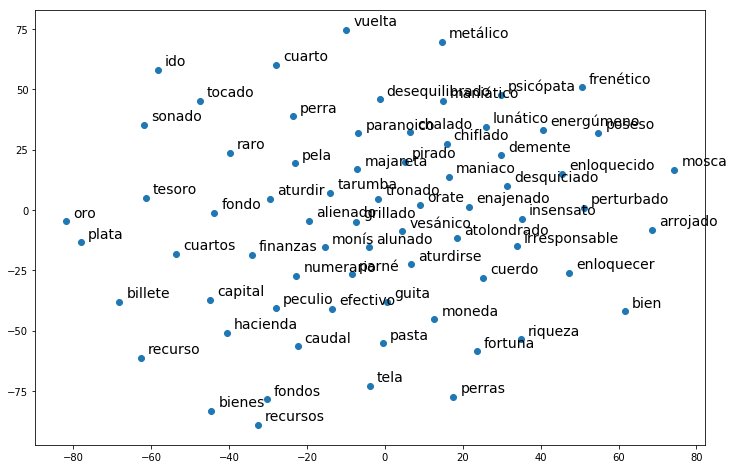

In [33]:
df_2D = plot_encoded_words(encoded, words)

It seems to be a good geometric separation of the two classes (synomims of "loco" and "dinero")

## Export corpus-specific word vectors

### Corpus vectors

In [40]:
word_vectors.vector_size

400

In [47]:
corpus = list(alex_df['Tokens_Stop'].apply(lambda x: ast.literal_eval(x)))

In [49]:
unique_words = set()
for doc in corpus:
    for word in doc: 
        unique_words.add(word)

In [54]:
len(unique_words)

2556

In [88]:
my_vectors = pd.DataFrame(columns=['word','vector'])

In [89]:
my_vectors

,word,vector


In [82]:
# word_vectors.get_vector('oblidado').tolist()

In [94]:
i = 0
for word in list(unique_words):
    # print(word)
    if word in word_vectors.vocab:
        # print("OK")
        my_vectors.loc[i] = [word, word_vectors.get_vector(word).tolist()]
        i += 1

In [95]:
my_vectors

,word,vector
0,trifulca,"[-1.1512731313705444, -0.23514406383037567, 0...."
1,ví,"[0.70328289270401, 0.5143758058547974, 1.24149..."
2,suelen,"[-0.284926176071167, -1.8658846616744995, 1.53..."
3,frenética,"[-1.6416864395141602, 1.5233111381530762, 1.14..."
4,pasaba,"[-2.285041332244873, -4.087771415710449, 0.675..."
5,acabó,"[-3.648432493209839, -0.6001234650611877, 2.80..."
6,pesadilla,"[2.836350440979004, 0.9079900979995728, -1.584..."
7,preocupaciones,"[1.0357916355133057, 0.648125410079956, -1.508..."
8,jorge,"[-0.5235119462013245, -0.6806917190551758, -0...."
9,culpable,"[-1.9412060976028442, -1.4236963987350464, -0...."


### Save corpus embeddings

In [97]:
myW2V_path = "D:\\Dropbox-Array2001\\Dropbox\\DataSets\\Prolexitim-Dataset\\Prolexitim_v2_MyWord2Vec.csv"
my_vectors.to_csv(myW2V_path, sep=';', encoding='utf-8', index=False)